### Red neuronal para predecir el ganador de un duelo en el juego League ogf Legends

In [3]:
import numpy as np
import pandas as pd
import sklearn

In [4]:
data = pd.read_csv("games.csv", sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        50286 non-null  int64
 1   firstBlood          50286 non-null  int64
 2   firstTower          50286 non-null  int64
 3   firstInhibitor      50286 non-null  int64
 4   firstBaron          50286 non-null  int64
 5   firstDragon         50286 non-null  int64
 6   firstRiftHerald     50286 non-null  int64
 7   t1_towerKills       50286 non-null  int64
 8   t1_inhibitorKills   50286 non-null  int64
 9   t1_baronKills       50286 non-null  int64
 10  t1_dragonKills      50286 non-null  int64
 11  t1_riftHeraldKills  50286 non-null  int64
 12  t2_towerKills       50286 non-null  int64
 13  t2_inhibitorKills   50286 non-null  int64
 14  t2_baronKills       50286 non-null  int64
 15  t2_dragonKills      50286 non-null  int64
 16  t2_riftHeraldKills  50286 non-null  int6

In [5]:
data.head(30)

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
0,1949,2,1,1,1,1,2,11,1,2,3,0,5,0,0,1,1,1
1,1851,1,1,1,0,1,1,10,4,0,2,1,2,0,0,0,0,1
2,1493,2,1,1,1,2,0,8,1,1,1,0,2,0,0,1,0,1
3,1758,1,1,1,1,1,0,9,2,1,2,0,0,0,0,0,0,1
4,2094,2,1,1,1,1,0,9,2,1,3,0,3,0,0,1,0,1
5,2059,2,2,1,1,2,0,8,1,1,1,0,6,0,0,3,0,1
6,1993,1,2,1,1,1,1,10,2,1,2,1,2,0,0,0,0,1
7,1334,1,1,0,0,2,1,6,0,0,0,1,0,0,0,2,0,1
8,1387,2,2,2,0,2,2,0,0,0,0,0,8,1,0,2,1,2
9,2681,2,2,2,2,2,0,10,1,0,2,0,8,3,1,2,0,2


# Se hace una descripción estadistica

In [6]:
data.describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000
mean,1871.386032,1.487233,1.485125,1.339578,0.948693,1.477270,0.749195,5.835163,1.041781,0.381200,1.420356,0.257487,5.681999,1.008611,0.424472,1.437975,0.245854,1.493776
std,450.876052,0.499842,0.500499,0.652960,0.838988,0.530346,0.824393,3.740575,1.269064,0.588001,1.201740,0.437254,3.809336,1.261867,0.617672,1.219412,0.430597,0.499966
min,610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1554.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2156.750000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


# Se separan los datos (80% de entrenamiento y 20% de prueba)

In [7]:
from sklearn.model_selection import train_test_split 
N=len(data)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(data, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [8]:
train_data.shape

(40228, 18)

In [9]:
train_data.head(20)

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
3126,1892,2,1,1,2,1,1,9,1,0,3,1,2,0,1,0,0,1
46095,1310,1,1,1,0,2,1,7,1,0,0,1,0,0,0,1,0,1
38839,1664,1,2,2,2,2,1,2,0,0,0,1,9,2,1,2,0,2
24522,2170,1,1,1,1,1,1,11,4,1,5,1,2,0,0,0,0,1
36752,2080,2,1,1,2,1,0,9,2,0,4,0,0,0,1,0,0,1
32348,1421,2,1,2,2,2,2,4,0,0,0,0,7,1,1,1,1,2
44590,1782,2,2,2,2,2,2,0,0,0,0,0,10,3,1,3,1,2
31779,2786,2,1,1,0,1,0,11,6,0,3,0,7,2,0,1,0,1
35340,2690,1,1,1,2,1,0,6,2,0,3,0,8,1,2,1,0,2
10596,2066,2,2,2,2,2,1,4,0,0,1,1,10,2,2,3,0,2


# Se normalizan los datos por medio de un Pipeline para todos los atributos, teniendo en cuenta que todos son de tipo entero

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_attribs = ['gameDuration', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills']
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    
    ])

In [11]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

In [12]:
X_train = full_pipeline.fit_transform(train_data)

X_train[0,:]

array([ 0.04592056,  1.02379908, -0.97041101, -0.51638265,  1.25245738,
       -0.90128082,  0.3065544 ,  0.84740583, -0.03016799, -0.64872399,
        1.3168528 ,  1.69893725, -0.96439246, -0.79850448,  0.93678568,
       -1.18094709, -0.56973383])

# Se estrae las etiquetas de clase

In [13]:
y_train = train_data['winner']
y_train

3126     1
46095    1
38839    2
24522    1
36752    1
        ..
44459    2
13270    2
32163    1
6015     1
19190    1
Name: winner, Length: 40228, dtype: int64

# Se crean las redes neuronales

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

modelo1 = MLPClassifier(activation='logistic',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(40, 50), random_state=123)
modelo1.fit(X_train, y_train)
scores1 = cross_val_score(modelo1, X_train, y_train, cv=5, scoring='accuracy')
print(scores1)
scores1.mean()

/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to conv

[0.9796172  0.97700721 0.97477007 0.97638285 0.97750155]


/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9770557763957308

In [15]:
modelo2 = MLPClassifier(activation='identity',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(16,4), random_state=123)
modelo2.fit(X_train, y_train)
scores2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='accuracy')
print(scores2)
scores2.mean()

[0.97340293 0.97054437 0.97203579 0.9692977  0.97252952]


0.9715620638136186

In [16]:
modelo3 = MLPClassifier(activation='logistic',solver='sgd', alpha=1e-5,hidden_layer_sizes=(23,7), random_state=123)
modelo3.fit(X_train, y_train)
scores3 = cross_val_score(modelo3, X_train, y_train, cv=5, scoring='accuracy')
print(scores3)
scores3.mean()

/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.97526721 0.97141437 0.97153865 0.97178372 0.97165942]


/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9723326732073672

In [17]:
modelo4 = MLPClassifier(activation='tanh',solver='sgd', alpha=1e-5,hidden_layer_sizes=(50,), random_state=123)
modelo4.fit(X_train, y_train)
scores4 = cross_val_score(modelo4, X_train, y_train, cv=5, scoring='accuracy')
print(scores4)
scores4.mean()

[0.97775292 0.97377579 0.97352722 0.97389683 0.97377253]


0.9745450576524946

In [18]:
modelo5 = MLPClassifier(activation='relu',solver='adam', alpha=1e-5,hidden_layer_sizes=(12,23), random_state=123)
modelo5.fit(X_train, y_train)
scores5 = cross_val_score(modelo5, X_train, y_train, cv=5, scoring='accuracy')
print(scores5)
scores5.mean()

[0.98086005 0.97986577 0.97949292 0.97849596 0.97874456]


0.9794918528591119

In [19]:
X_test = full_pipeline.transform(test_data)
X_test

array([[ 0.41898172,  1.02379908, -0.97041101, ..., -0.68939083,
        -1.18094709, -0.56973383],
       [-0.72462839, -0.97675415, -0.97041101, ..., -0.68939083,
        -1.18094709, -0.56973383],
       [ 0.36568727,  1.02379908,  1.0274239 , ...,  0.93678568,
        -0.36078378, -0.56973383],
       ...,
       [-0.4248471 ,  1.02379908,  1.0274239 , ...,  0.93678568,
         0.45937953,  1.75520557],
       [ 0.03925875, -0.97675415, -0.97041101, ..., -0.68939083,
        -1.18094709, -0.56973383],
       [-0.3271406 ,  1.02379908,  1.0274239 , ..., -0.68939083,
         0.45937953, -0.56973383]])

In [20]:
y_pred1 = modelo1.predict(X_test)  
y_pred2 = modelo2.predict(X_test)  
y_pred3 = modelo3.predict(X_test) 
y_pred4 = modelo4.predict(X_test)
y_pred5 = modelo5.predict(X_test)  

In [21]:
y_test = test_data["winner"]

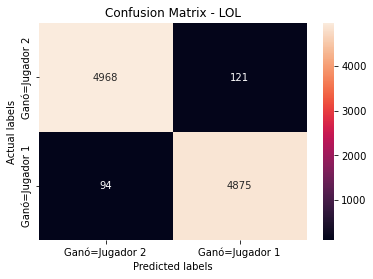

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

modelos = []
ax = plt.subplot()


modelos.append(["Modelo 1", accuracy_score(y_test, y_pred1)])
confusion_matrix1 = confusion_matrix(y_test, y_pred1)

# Matriz de confusión
sns.heatmap(confusion_matrix1, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()


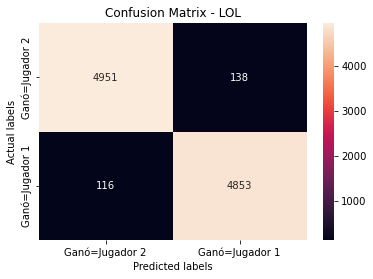

In [23]:
ax = plt.subplot()

modelos.append(["Modelo 2", accuracy_score(y_test, y_pred2)])
confusion_matrix2 = confusion_matrix(y_test, y_pred2)

# Matriz de confusión
sns.heatmap(confusion_matrix2, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()


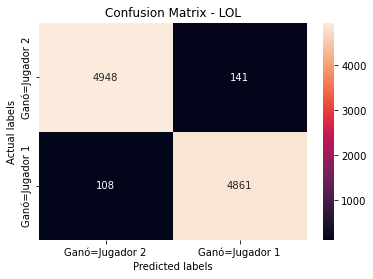

In [24]:
ax = plt.subplot()

modelos.append(["Modelo 3", accuracy_score(y_test, y_pred3)])
confusion_matrix3 = confusion_matrix(y_test, y_pred3)

# Matriz de confusión
sns.heatmap(confusion_matrix3, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()


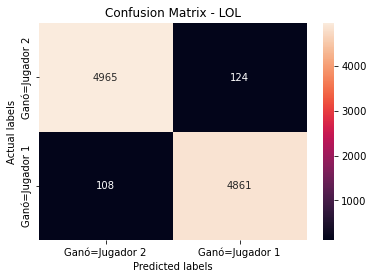

In [25]:
ax = plt.subplot()

modelos.append(["Modelo 4", accuracy_score(y_test, y_pred4)])
confusion_matrix4 = confusion_matrix(y_test, y_pred4)

# Matriz de confusión
sns.heatmap(confusion_matrix4, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()


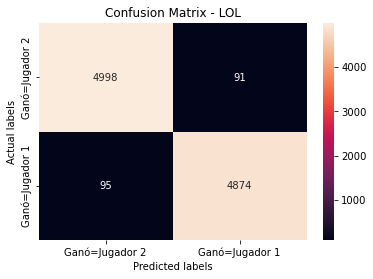

In [26]:
ax = plt.subplot()

modelos.append(["Modelo 5", accuracy_score(y_test, y_pred5)])
confusion_matrix5 = confusion_matrix(y_test, y_pred5)

# Matriz de confusión
sns.heatmap(confusion_matrix5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - LOL') 
ax.xaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
ax.yaxis.set_ticklabels(['Ganó=Jugador 2', 'Ganó=Jugador 1'])
plt.show()

In [27]:
tabla_precision=pd.DataFrame(modelos, columns=["Modelo", "Precisión"])
tabla_precision

,Modelo,Precisión
0,Modelo 1,0.978624
1,Modelo 2,0.974746
2,Modelo 3,0.975244
3,Modelo 4,0.976934
4,Modelo 5,0.981507


## La mayor precisión es de 0.977928 y los hiperparametros que permiten obtener esta mayor precisión son:
### Función de activación: **relu**
### solver: **adam**, 
### hidden_layer_sizes=(12,23), 2 **capas ocultas** y 12 y 23 **neuronas** por cada una de las capas

## Para las siguientes pruebas se parte de los hiperparámetros del modelo 5, ya que este obtuvo la mejor precisión.

En las cuales se tuvo en cuenta el hiperparámetro **epsilon**.
Epsilon permite tener estabilidad numérica en adam. Solo se usa cuando solver='adam'.

In [28]:
modelo6 = MLPClassifier(activation='logistic', solver='adam', alpha=1e-5, hidden_layer_sizes=(12, 23), epsilon=1e-7, random_state=123)
modelo6.fit(X_train, y_train)
scores6 = cross_val_score(modelo6, X_train, y_train, cv=5, scoring='accuracy')
print(scores6)
scores6.mean()

[0.98197862 0.97986577 0.9813572  0.97998757 0.97874456]


0.9803867445222908

In [31]:
modelo7 = MLPClassifier(activation='logistic', solver='adam', alpha=1e-5, hidden_layer_sizes=(12, 23), epsilon=1e-1, random_state=123)
modelo7.fit(X_train, y_train)
scores7 = cross_val_score(modelo7, X_train, y_train, cv=5, scoring='accuracy')
print(scores7)
scores7.mean()

/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.97514293 0.97129008 0.97265722 0.97128651 0.97103791]


/Users/manuel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9722829312559063

In [32]:
y_pred6 = modelo6.predict(X_test)
y_pred7 = modelo7.predict(X_test) 

In [46]:
modelos.append(["Modelo nuevo 1", accuracy_score(y_test, y_pred6)])
modelos.append(["Modelo nuevo 2", accuracy_score(y_test, y_pred7)])
tabla_precision=pd.DataFrame(modelos[4:], columns=["Modelo", "Precisión"])
tabla_precision

,Modelo,Precisión
0,Modelo 5,0.981507
1,Modelo nuevo 1,0.980016
2,Modelo nuevo 2,0.974846


### En la tabla anterior podemos observar que los nuevos modelos no pudieron superar la precisión del modelo 5, de la primer prueba. En el caso del **Modelo nuevo 1** estuvo más cerca que el **Modelo nuevo 2**, con esto determinamos que añadir un nuevo hiperparámetro, siendo en este caso **epsilon**, no garantiza una mejora en la precisión del modelo, en caso contrario se notó una desmejora en el modelo, cuando se hizo la variación de **epsilon** para obtener el resultado de **Modelo nuevo 2**.